In [ ]:
#提高流量好方法     不再執行
#!jupyter notebook --NotebookApp.iopub_data_rate_limit=1000000000

一、研究子主題:如何從現有的台灣經濟新聞標題中，分辨何時的事件會對市場造成負面影響?

二、專案目標:由於脫歐相關新聞中同時包含對股市會造成正面影響及負面影響的資訊，只透過單一關鍵字(中美貿易戰)不一定能看出該新聞對市場判斷的影響，因此希望透過數據探勘及機器學習，找出經濟新聞標題常見關鍵字與中美貿易戰事件正負面的關係。 真正能代表脫歐相關新聞中，分別代表正負面事件的常見關鍵詞。

三、研究方式: 透過PYTHON進行資料找尋、整理和分析，用xlwt將資料存成csv。再透過結疤、nltk情緒分析找出正負面關鍵詞，用sklearn進行K-means分群分析，並用matplotlib製作出視覺化圖表，以找出真正能代表中美貿易戰相關新聞中，分別代表正負面事件的常見關鍵詞。

四、研究步驟:
1. 設定想研究的資料目標、事件和資料範圍(時間、項目)
2. 透過爬蟲經濟日報，找出有貿易戰標籤的新聞網址
3. 再用網址逐一獲得3000多篇文章中的時間、標題及簡介
4. 將一整串的標題轉換成單一的詞彙，並找出最常出現的詞彙
5. 使用nltk情緒分析判定正面及負面詞彙
6. 計算每天正負詞彙量的比例
7. 決定分群數量
8. 用k means分出群
9. k means及nltk分類法的小結論

1.設定想研究的資料目標、事件和資料範圍(時間、項目)
為了判斷接下來一年內中貿易戰新聞對於股市投資人的影響，我們將時間軸往回推一年(2018/6~2019/5)，並以經濟日報作為台灣部分新聞的主要來源。希望能夠確認如經濟日報這類的權威性文章對台灣etf投資人會有怎麼樣的影響，首先以台灣元大50etf投資人的行為當成研究目標。

2.透過爬蟲經濟日報，找出有貿易戰標籤的新聞網址
我們發現經濟日報會將與中美貿易戰相關的新聞加上「貿易戰」的標籤，並可透過搜尋此標籤找到過去的相關新聞，並呈現在151個頁面中。
由於這151個頁面中會多次重複同樣的新聞網址，導致抓取到的新聞網址數多達30萬個，甚至超過excel列數，因此存了六個檔案，但後來覺得應該只要一個檔案但持續換行就好。

In [1]:
# #-------------------------------------收集經濟日報有貿易戰tag的文章網址---------勿再執行
import sys
import os
import requests, json, csv, datetime
import re
from xlwt import *
from xlrd import *
import pickle
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import time
break_point = str()
udn_a_list = []
udn_a_href_list_all = []
udn_a_href_list_news_addr = []
url = 'https://money.udn.com/search/tagging/1001/貿易戰/3'
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(1,70):
    if row_1 > 65530:
        break_point = g
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址.csv')

In [2]:
#---------------已儲存勿再執行
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(71,110):
    if row_1 > 65530:
        break_point = g
        print(count)
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                print(count)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址2.csv')

In [3]:
#---------------已儲存勿再執行
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(96,120):
    if row_1 > 65530:
        break_point = g
        print(count)
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                print(count)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址3.csv')

In [4]:
#---------------已儲存勿再執行
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(114,140):
    if row_1 > 65530:
        break_point = g
        print(count)
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                print(count)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址4.csv')

In [5]:
#---------------已儲存勿再執行
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(130,150):
    if row_1 > 65530:
        break_point = g
        print(count)
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                print(count)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址5.csv')

In [6]:
#---------------已儲存勿再執行
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(145,155):
    if row_1 > 65530:
        break_point = g
        print(count)
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                print(count)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址6.csv')

2.透過爬蟲經濟日報，找出有貿易戰標籤的新聞網址
在其他地方整理好重複的網址資訊，發現過去一年內共有3083則與貿易戰相關的新聞，並存成csv檔案。

In [2]:
import xlrd
udn_a_href_list_news_addr_short =  []
file_r = 'C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址新.csv'
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(0)
for y in range(3083):
    udn_a_href_list_news_addr_short.append(sheet_1.cell_value(rowx=y,colx=0))   
print(udn_a_href_list_news_addr_short[-3])

https://money.udn.com/money/story/5641/3238233


In [ ]:
3.再用網址逐一獲得3000多篇文章中的時間、標題及簡介
讀入網址檔案，並逐一獲得需要的內容，存成csv檔案。(過程中被擋了超級多次，後來發現使用管院網路就不會被擋)

In [7]:
#--------------------抓取經濟日報日期標題簡介，並存成csv、pickle-----勿再執行
import sys
import os
import requests, json, csv, datetime
import re
from xlrd import *
import pickle
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import time
from xlwt import *
udn_a_href_list_news_addr_short_new=[]
file_r = "C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址新.csv"
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(0)
for t in range(3083):
    udn_a_href_list_news_addr_short_new.append(sheet_1.cell_value(rowx=t,colx=0))
row = 0
file = Workbook(encoding = 'utf-8')
#指定file以utf-8的格式打开
table = file.add_sheet('文字內容')
udn_adr_a_list_o_title = []
udn_adr_a_list_o_description = []
udn_adr_a_list_o_date = []    
print("check p 1")
print(len(udn_a_href_list_news_addr_short_new))
print(udn_a_href_list_news_addr_short_new)
try:
    for adr in udn_a_href_list_news_addr_short_new:
        #time.sleep(1)
        udn_adr_res = requests.get(adr,verify = False)
        udn_adr_res.encoding = "UTF-8"
        udn_adr_soup = BeautifulSoup(udn_adr_res.text)
        #print(udn_adr_soup)
        udn_adr_a_find_title = udn_adr_soup.find_all("meta",property="og:title")
        udn_adr_a_list_o_title.append(udn_adr_a_find_title[0]['content'])
        udn_adr_a_find_description = udn_adr_soup.find_all("meta",attrs={'name':"description"})
        udn_adr_a_list_o_description.append(udn_adr_a_find_description[0]['content'])
        udn_adr_a_find_date = udn_adr_soup.find_all("meta",attrs={'name':"date"})
        table.write(row,0,udn_adr_a_find_date[0]['content'])
        table.write(row,1,udn_adr_a_find_title[0]['content'])
        table.write(row,2,udn_adr_a_find_description[0]['content'])
        row +=1
        #print(row)
    print(udn_adr_a_list_o_title[-3])
    print(udn_adr_a_list_o_description[-3])
    print(udn_adr_a_list_o_date[-3])
    file.save('C:\\Users\\Will\\Desktop\\經濟日報文字內容2.csv')
except BaseException:
    file.save('C:\\Users\\Will\\Desktop\\經濟日報文字內容2.csv')
    print(udn_adr_a_list_o_title)
    print(udn_adr_a_list_o_description)
    print(udn_adr_a_list_o_date)

361360


c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\will\appdata\local\programs\python\python36-32\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\will\appda

ConnectionError: HTTPSConnectionPool(host='money.udn.com', port=443): Max retries exceeded with url: /money/story/10511/3831763 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x065E2F30>: Failed to establish a new connection: [WinError 10060] 連線嘗試失敗，因為連線對象有一段時間並未正確回應，或是連線建立失敗，因為連線的主機無法回應。',))

3.再用網址逐一獲得3000多篇文章中的時間、標題及簡介
再從csv中拿取資料，轉換成list

In [4]:
#-----------------取得經濟日報文字內容
from xlrd import *
from xlwt import *
import pickle
all_udn_news_data_dict = {'date':[],'title':[],'summary':[]}
file_r = "C:\\Users\\Will\\Desktop\\經濟日報文字內容2.csv"
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(0)
for t in range(3083):
    all_udn_news_data_dict['date'].append(sheet_1.cell_value(rowx=t,colx=0))
for t in range(3083):
    all_udn_news_data_dict['title'].append(sheet_1.cell_value(rowx=t,colx=1))
for t in range(3083):
    all_udn_news_data_dict['summary'].append(sheet_1.cell_value(rowx=t,colx=2))
# file = open('經濟日報內容.pickle', 'wb')
# pickle.dump(all_udn_news_data_dict, file)
# file.close()

In [5]:
# print(udn_adr_a_list_o_title)
# print(len(udn_adr_a_list_o_title))
# print(udn_adr_a_list_o_date)
udn_adr_a_list_o_date = all_udn_news_data_dict['date']
udn_adr_a_list_o_title = all_udn_news_data_dict['title']
udn_adr_a_list_o_description = all_udn_news_data_dict['summary']

In [ ]:
3.再用網址逐一獲得3000多篇文章中的時間、標題及簡介
整理成可用資料
整理成以時間為key的dict

In [6]:
import datetime
today = datetime.date.today()
date_list = []
data_size_date = 340
for i in range(1,data_size_date):
    date = today - datetime.timedelta(days=i)
    date = date.strftime("%Y-%m-%d %H:%M:%S")
    str_date = date[0]+date[1]+date[2]+date[3]+"/"+date[5]+date[6]+"/"+date[8]+date[9]
    date_list.append(str_date)
print(date_list)

['2019/05/29', '2019/05/28', '2019/05/27', '2019/05/26', '2019/05/25', '2019/05/24', '2019/05/23', '2019/05/22', '2019/05/21', '2019/05/20', '2019/05/19', '2019/05/18', '2019/05/17', '2019/05/16', '2019/05/15', '2019/05/14', '2019/05/13', '2019/05/12', '2019/05/11', '2019/05/10', '2019/05/09', '2019/05/08', '2019/05/07', '2019/05/06', '2019/05/05', '2019/05/04', '2019/05/03', '2019/05/02', '2019/05/01', '2019/04/30', '2019/04/29', '2019/04/28', '2019/04/27', '2019/04/26', '2019/04/25', '2019/04/24', '2019/04/23', '2019/04/22', '2019/04/21', '2019/04/20', '2019/04/19', '2019/04/18', '2019/04/17', '2019/04/16', '2019/04/15', '2019/04/14', '2019/04/13', '2019/04/12', '2019/04/11', '2019/04/10', '2019/04/09', '2019/04/08', '2019/04/07', '2019/04/06', '2019/04/05', '2019/04/04', '2019/04/03', '2019/04/02', '2019/04/01', '2019/03/31', '2019/03/30', '2019/03/29', '2019/03/28', '2019/03/27', '2019/03/26', '2019/03/25', '2019/03/24', '2019/03/23', '2019/03/22', '2019/03/21', '2019/03/20', '2019

In [7]:
#------------整理成以時間為key的dict
#udn_adr_a_list_o_description = ['台北市電腦公會理事長、和碩董事長童子賢昨（28）日表示，這波貿易戰變化出乎外界意料，若變成長期抗戰，全球面臨貿易結構，包含智財權、零組件研發製造、銷售，甚至是手機品牌、PC代工廠間的訂單版圖等，都會重新洗牌。', '羅默昨（28）日表示，美中貿易戰源起於雙方對政府在經濟上應該扮演的角色認知不一樣，若是雙方無法進行務實、理性的討論，並形成共識，則貿易戰不會有進展，並將使得1980年代以來，全球經濟持續增長的態勢，蒙上悲觀的陰影。', '台積電創辦人張忠謀昨（28）日表示，美中貿易戰將造成非常嚴重的影響，不僅企業和消費者要付出代價，影響所及包括中國、美國以及全世界，也會直接衝擊科技創新的進展，甚至連第五代行動通訊（5G）發展都會放緩。', '亞洲大學校長蔡進發表示，同學們透過與羅默座談，不僅可以對全球、台灣經濟議題有更多的認識、了解；透過羅默的人生經驗，也可以對未來職涯發展有所啟發。', '政治大學財務管理學系特聘教授周行一昨（28）日在出席「2019大師論壇」時表示，短期間美中貿易戰仍會持續，中長期會隨著美國與世界經濟狀況動態演變，過程中正面與負面資訊將層出不窮，影響金融市場，偶爾股市會有好的表現，簡言之，未來一、二年全球經濟是悲觀的。', '美中貿易戰已進入危險新階段，彭博資訊經濟學家推算，若演變成全面貿易戰的最糟情境，2021年全球國內生產毛額（GDP）將比沒有貿易戰的情況減損0.6%，估計達6,000億美元。其中，台灣的電腦與電子產品、金屬與金屬產品，是曝險前兩高的產業。', '美國宣布5月10日起將對總值2,000億美元自中國進口商品調升關稅至25%，隨後全球金融市場震盪加劇，依原計畫時程前往美國談判的劉鶴副總理，在沒有達成協議下黯然離美返中。美中貿易戰突然變調，演變為延長賽著實令人感到意外，到底雙方各有甚麼盤算和憑恃？令各界頗感焦慮。', '美國宣布5月10日起將對總值2,000億美元自中國進口商品調升關稅至25%，隨後全球金融市場震盪加劇，依原計畫時程前往美國談判的劉鶴副總理，在沒有達成協議下黯然離美返中。美中貿易戰突然變調，演變為延長賽著實令人感到意外，到底雙方各有甚麼盤算和憑恃？令各界頗感焦慮。', '中美貿易紛爭，華為概念股成重災區，誰才是亂世中的資金避風港？', '繼美國於2018年間陸續對若干中國進口商品徵收10%-30%的關稅（稅率視具體商品而定，包括自2018年9月2...', '台北國際電腦展於28日登場，今年以5G、人工智慧（AI）、物連網(IoT)、電競與XR、智慧零售與區塊鏈等數位經濟趨勢作為展覽六大主題。\r\n\r\n近期科技股飽受貿易戰困擾，電子類股指數領先破半年線，預期', '4月景氣對策信號的燈號維持在黃藍燈，而綜合判斷分數為21分，創六個月來新高，但仍需注意下半年走勢。\r\n\r\n川普5月以來頻頻對中國祭出各種打壓措施，全球股市均受貿易戰影響，紛紛走跌。\r\n\r\n台股大盤雖守', '國立政治大學財務管理學系特聘教授周行一今（28）日在出席由《經濟日報》主辦的「2019大師論壇」進行專題演講時表示，短...', '諾貝爾經濟學獎得主羅默（Paul M.Romer）今天指出，美中貿易戰是雙方對政府在經濟上扮演角色的認知不同，若雙方無法進行務實與理性的討論並達成共識，貿易戰不會有進展，並將使得自1980年代以來全球經濟持續增長的態勢，蒙上悲觀的陰影。', '2019 COMPUTEX（台北國際電腦展）今天開幕，全球半導體產業大咖雲集，今年外界關心除了新產品，重中之重問題還是貿易戰、華為事件對產業及企業影響；然各家高層對華為事件多數是輕描淡寫，甚至走人、避談，成為今年COMPUTEX奇特景象。', '美中貿易戰逐漸演變為科技戰，但全球手機品牌大廠三星、索尼、小米等搶推無線藍牙耳機熱度不減。根據TrendForce旗下拓墣產業研究院最新報告，2019年無線藍牙耳機全球出貨量達7,800萬組，年增高達52.9%，成為貿易、科技戰下，科技業重要救命丹，IC設計族群切入無線藍牙耳機供應鏈瑞昱（2379）、盛群（6202）、原相（3227）、通泰（5487）、鈺太（6679）等可望受惠。', '去年諾貝爾經濟學獎得主之一羅默（Paul Romer）指出，大學原本主修天文和物理，後來想念法學院，因為當律師可賺不少錢；結果經濟學老師告訴他，搞經濟學也可賺錢。他這一轉念，造就了一位諾貝爾獎得主。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）今天以「想像與務實」發表專題演講。他強調，全球經濟成長歷經三個時期，分別是1956至1969年的無止盡成長期、1970至1982年之間的成長受限期，以及1980年代之後的全球經濟蓬勃發展期。', '台指期今（28）日早盤開高，盤中在平盤附近震盪，法人預期將呈現震盪整理格局，而在明後日的台指 周選及摩台結算方面，預期拉高結算機會不大。在商品期貨的操作策略上，交易人可偏多布局債券、日圓等、偏空布局澳幣、英鎊等。', '上周加權指數一度出現收復短期均線之勢，然而隨著美中貿易戰升級為科技冷戰，加上新台幣貶破31.5元關卡，影響法人進場承接意願，拖累台股面臨年線保衛戰。昨（27）日台幣小幅回升，技術面留下十字線的K棒，是否出現止跌的契機？幾個籌碼面數據值得觀察。', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '台北市電腦公會理事長、和碩董事長童子賢昨（28）日表示，這波貿易戰變化出乎外界意料，若變成長期抗戰，全球面臨貿易結構，包含智財權、零組件研發製造、銷售，甚至是手機品牌、PC代工廠間的訂單版圖等，都會重新洗牌。', '羅默昨（28）日表示，美中貿易戰源起於雙方對政府在經濟上應該扮演的角色認知不一樣，若是雙方無法進行務實、理性的討論，並形成共識，則貿易戰不會有進展，並將使得1980年代以來，全球經濟持續增長的態勢，蒙上悲觀的陰影。', '台積電創辦人張忠謀昨（28）日表示，美中貿易戰將造成非常嚴重的影響，不僅企業和消費者要付出代價，影響所及包括中國、美國以及全世界，也會直接衝擊科技創新的進展，甚至連第五代行動通訊（5G）發展都會放緩。', '亞洲大學校長蔡進發表示，同學們透過與羅默座談，不僅可以對全球、台灣經濟議題有更多的認識、了解；透過羅默的人生經驗，也可以對未來職涯發展有所啟發。', '政治大學財務管理學系特聘教授周行一昨（28）日在出席「2019大師論壇」時表示，短期間美中貿易戰仍會持續，中長期會隨著美國與世界經濟狀況動態演變，過程中正面與負面資訊將層出不窮，影響金融市場，偶爾股市會有好的表現，簡言之，未來一、二年全球經濟是悲觀的。', '美中貿易戰已進入危險新階段，彭博資訊經濟學家推算，若演變成全面貿易戰的最糟情境，2021年全球國內生產毛額（GDP）將比沒有貿易戰的情況減損0.6%，估計達6,000億美元。其中，台灣的電腦與電子產品、金屬與金屬產品，是曝險前兩高的產業。', '美國宣布5月10日起將對總值2,000億美元自中國進口商品調升關稅至25%，隨後全球金融市場震盪加劇，依原計畫時程前往美國談判的劉鶴副總理，在沒有達成協議下黯然離美返中。美中貿易戰突然變調，演變為延長賽著實令人感到意外，到底雙方各有甚麼盤算和憑恃？令各界頗感焦慮。', '美國宣布5月10日起將對總值2,000億美元自中國進口商品調升關稅至25%，隨後全球金融市場震盪加劇，依原計畫時程前往美國談判的劉鶴副總理，在沒有達成協議下黯然離美返中。美中貿易戰突然變調，演變為延長賽著實令人感到意外，到底雙方各有甚麼盤算和憑恃？令各界頗感焦慮。', '中美貿易紛爭，華為概念股成重災區，誰才是亂世中的資金避風港？', '繼美國於2018年間陸續對若干中國進口商品徵收10%-30%的關稅（稅率視具體商品而定，包括自2018年9月2...', '台北國際電腦展於28日登場，今年以5G、人工智慧（AI）、物連網(IoT)、電競與XR、智慧零售與區塊鏈等數位經濟趨勢作為展覽六大主題。\r\n\r\n近期科技股飽受貿易戰困擾，電子類股指數領先破半年線，預期', '4月景氣對策信號的燈號維持在黃藍燈，而綜合判斷分數為21分，創六個月來新高，但仍需注意下半年走勢。\r\n\r\n川普5月以來頻頻對中國祭出各種打壓措施，全球股市均受貿易戰影響，紛紛走跌。\r\n\r\n台股大盤雖守', '國立政治大學財務管理學系特聘教授周行一今（28）日在出席由《經濟日報》主辦的「2019大師論壇」進行專題演講時表示，短...', '諾貝爾經濟學獎得主羅默（Paul M.Romer）今天指出，美中貿易戰是雙方對政府在經濟上扮演角色的認知不同，若雙方無法進行務實與理性的討論並達成共識，貿易戰不會有進展，並將使得自1980年代以來全球經濟持續增長的態勢，蒙上悲觀的陰影。', '2019 COMPUTEX（台北國際電腦展）今天開幕，全球半導體產業大咖雲集，今年外界關心除了新產品，重中之重問題還是貿易戰、華為事件對產業及企業影響；然各家高層對華為事件多數是輕描淡寫，甚至走人、避談，成為今年COMPUTEX奇特景象。', '美中貿易戰逐漸演變為科技戰，但全球手機品牌大廠三星、索尼、小米等搶推無線藍牙耳機熱度不減。根據TrendForce旗下拓墣產業研究院最新報告，2019年無線藍牙耳機全球出貨量達7,800萬組，年增高達52.9%，成為貿易、科技戰下，科技業重要救命丹，IC設計族群切入無線藍牙耳機供應鏈瑞昱（2379）、盛群（6202）、原相（3227）、通泰（5487）、鈺太（6679）等可望受惠。', '去年諾貝爾經濟學獎得主之一羅默（Paul Romer）指出，大學原本主修天文和物理，後來想念法學院，因為當律師可賺不少錢；結果經濟學老師告訴他，搞經濟學也可賺錢。他這一轉念，造就了一位諾貝爾獎得主。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）今天以「想像與務實」發表專題演講。他強調，全球經濟成長歷經三個時期，分別是1956至1969年的無止盡成長期、1970至1982年之間的成長受限期，以及1980年代之後的全球經濟蓬勃發展期。', '台指期今（28）日早盤開高，盤中在平盤附近震盪，法人預期將呈現震盪整理格局，而在明後日的台指 周選及摩台結算方面，預期拉高結算機會不大。在商品期貨的操作策略上，交易人可偏多布局債券、日圓等、偏空布局澳幣、英鎊等。', '上周加權指數一度出現收復短期均線之勢，然而隨著美中貿易戰升級為科技冷戰，加上新台幣貶破31.5元關卡，影響法人進場承接意願，拖累台股面臨年線保衛戰。昨（27）日台幣小幅回升，技術面留下十字線的K棒，是否出現止跌的契機？幾個籌碼面數據值得觀察。', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '對於近期美中貿易戰延伸至華為，對未來全球記憶體產業的衝擊及牽動，群聯董事長潘健成表示，目前華為已為後市積極備貨，再加上超微新處理器將自6月開始出貨，因此，潘健成預料，記憶體市況第三季表現不會差。', '廣達（2382）衝刺5G市場，強攻電信虛擬化商機，為日本樂天打造的虛擬化雲端原生行動網路和電信虛擬化架構解決方案，服務將於今年10月商轉啟用，成為明年成長動能之一，讓廣達對今明年伺服器業務「非常樂觀」，今年業績將持續雙位數成長。', '2020總統大選腳步接近，儘管電子股受到貿易戰殃及，但「台字輩」概念股卻意外竄紅，包括台產（2832）、台肥、台泥、台鹽等因各自擁有題材，逆勢表現，成為資金避風港。', '張忠謀今天出席由經濟日報主辦的大師論壇，並與2018年諾貝爾經濟學獎得主羅默對談。相較於羅默在演講時，不斷強調政府必須要介入市場力量...', '2018年諾貝爾經濟學獎得主羅默（Paul M.Romer）今（28）日表示，美中貿易戰源起於雙方對政府在經濟上應該扮...', '美中科技冷戰即將向外擴散，美國孤立華為，將拉起「數位鐵幕」，迫使一些科技界領導廠商面臨艱難的抉擇。', '【昨日盤勢】：\r\n受到上周五美股上揚激勵，台股昨日以上漲15點至10,344點開出後，在傳產權值股台塑四寶、和泰車及豐泰等拉升下，指數最高上漲37點，達10,365點；但隨即貿易戰隱憂再現，電子股再度承壓，台積電、大立光、可成及瑞昱等賣壓沈重，使得指數退回平盤附近整理，至尾盤收小紅。', '美中貿易戰升級，中國大陸為降低產業衝擊，祭出企業所得稅「兩免三減半」的租稅優惠。華為對台廠採購額高，我產業勢將遭受衝擊...', '經濟日報整理五件不可不知的財經大事，讓讀者在每天清晨能快速掌握最重要的財經大事。\r\n  \r\n一、川普：美還沒要簽協議\r\n美國總統川普27日在日本進行國是訪問時表示，美國還沒準備好與中國達成貿易協議。.', '美國總統川普27日在日本進行國是訪問時表示，美國還沒準備好與中國達成貿易協議。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）昨（27）日表示，美國這波景氣循環仍將持續，美中貿易戰也將持續，對美國國內生產毛額（GDP）成長率的衝擊約0.5個百分點。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）27日抵台指出，美國這波景氣循環仍將持續。美中貿易戰也將...', '台達化（1309）第1季每股純益0.6元，獲利直逼去年全年，表現優於預期，不過受到美中貿易爭端再起，台達化對於下半年看...', '未來十年，對年輕人來說將是台灣一段最好的時代。很多人不會同意這句，首先投資人都會反對。投資不怕價格跌，怕的是不確定性。在中美貿易戰下，光是川普的的Twitter就永遠無法掌握，更別提預測貿易戰何時結束；', '道瓊期貨上周五（24日）受到川普貿易戰將會有結果的言論而小幅反彈，夜盤道瓊近月期貨上揚79點收在25,617點，標普500期貨近月則小跌至2,827.50點。永豐期貨分析師廖玉完表示，道瓊近月期貨上周五連續兩天收黑，指數再度跌破5日線，且形成月線與季線的死亡交叉，短線再陷入回檔整理，目前走勢有形成頭肩頂的趨勢。本周道瓊期貨若有反彈，但若未過月線可逢高順勢操作，應嚴設停損停利。', '受到美中貿易戰紛擾未歇，全球股市5月呈現震盪整理。法人說，由於全球股票還是不乏許多相對正面的利多因子，也因此，投資人不應該放棄股票資產；此時布局應該轉向穩健且分散性布局，以居高思「穩」的角度，進而將目光轉移到全球股票型基金，藉由全球化布局降低風險。', '新台幣今天早盤以31.520元兌1美元，平盤開出。\n新台幣上周五終結連續一周來的貶值，終場以31.520元兌1美元，升...', '過去40年來，全球科技產業已在太平洋兩岸建立起綿密交織如網的供應鏈，但在美國政府決定將華為打入黑名單、禁止這家中國電信設備巨人在美國做生意和向美商採購零組件後，這整個供應鏈系統有分崩離析之虞。', '【昨日盤勢】：\r\n上周五台股以上漲5點至10,813點開出後，由於華為風暴未有解除跡象，市場消息紊亂，使大盤觀望氣氛濃厚，量能縮減，權值類股僅台積電、台達電、上海商銀等表現較為持穩，其餘漲跌互見，指數呈現狹幅震盪，未能收復五日均線，終場以小漲作收。', '超微（AMD）下半年火力全開，今年中央處理器（CPU）與繪圖處理器（GPU）兩大業務高階新產品將全數採用台積電7奈米製程生產。隨著超微大單報到，為台積電下半年接單注入強勁動能...', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '台北市電腦公會理事長、和碩董事長童子賢昨（28）日表示，這波貿易戰變化出乎外界意料，若變成長期抗戰，全球面臨貿易結構，包含智財權、零組件研發製造、銷售，甚至是手機品牌、PC代工廠間的訂單版圖等，都會重新洗牌。', '羅默昨（28）日表示，美中貿易戰源起於雙方對政府在經濟上應該扮演的角色認知不一樣，若是雙方無法進行務實、理性的討論，並形成共識，則貿易戰不會有進展，並將使得1980年代以來，全球經濟持續增長的態勢，蒙上悲觀的陰影。', '台積電創辦人張忠謀昨（28）日表示，美中貿易戰將造成非常嚴重的影響，不僅企業和消費者要付出代價，影響所及包括中國、美國以及全世界，也會直接衝擊科技創新的進展，甚至連第五代行動通訊（5G）發展都會放緩。', '亞洲大學校長蔡進發表示，同學們透過與羅默座談，不僅可以對全球、台灣經濟議題有更多的認識、了解；透過羅默的人生經驗，也可以對未來職涯發展有所啟發。', '政治大學財務管理學系特聘教授周行一昨（28）日在出席「2019大師論壇」時表示，短期間美中貿易戰仍會持續，中長期會隨著美國與世界經濟狀況動態演變，過程中正面與負面資訊將層出不窮，影響金融市場，偶爾股市會有好的表現，簡言之，未來一、二年全球經濟是悲觀的。', '美中貿易戰已進入危險新階段，彭博資訊經濟學家推算，若演變成全面貿易戰的最糟情境，2021年全球國內生產毛額（GDP）將比沒有貿易戰的情況減損0.6%，估計達6,000億美元。其中，台灣的電腦與電子產品、金屬與金屬產品，是曝險前兩高的產業。', '美國宣布5月10日起將對總值2,000億美元自中國進口商品調升關稅至25%，隨後全球金融市場震盪加劇，依原計畫時程前往美國談判的劉鶴副總理，在沒有達成協議下黯然離美返中。美中貿易戰突然變調，演變為延長賽著實令人感到意外，到底雙方各有甚麼盤算和憑恃？令各界頗感焦慮。', '美國宣布5月10日起將對總值2,000億美元自中國進口商品調升關稅至25%，隨後全球金融市場震盪加劇，依原計畫時程前往美國談判的劉鶴副總理，在沒有達成協議下黯然離美返中。美中貿易戰突然變調，演變為延長賽著實令人感到意外，到底雙方各有甚麼盤算和憑恃？令各界頗感焦慮。', '中美貿易紛爭，華為概念股成重災區，誰才是亂世中的資金避風港？', '繼美國於2018年間陸續對若干中國進口商品徵收10%-30%的關稅（稅率視具體商品而定，包括自2018年9月2...', '台北國際電腦展於28日登場，今年以5G、人工智慧（AI）、物連網(IoT)、電競與XR、智慧零售與區塊鏈等數位經濟趨勢作為展覽六大主題。\r\n\r\n近期科技股飽受貿易戰困擾，電子類股指數領先破半年線，預期', '4月景氣對策信號的燈號維持在黃藍燈，而綜合判斷分數為21分，創六個月來新高，但仍需注意下半年走勢。\r\n\r\n川普5月以來頻頻對中國祭出各種打壓措施，全球股市均受貿易戰影響，紛紛走跌。\r\n\r\n台股大盤雖守', '國立政治大學財務管理學系特聘教授周行一今（28）日在出席由《經濟日報》主辦的「2019大師論壇」進行專題演講時表示，短...', '諾貝爾經濟學獎得主羅默（Paul M.Romer）今天指出，美中貿易戰是雙方對政府在經濟上扮演角色的認知不同，若雙方無法進行務實與理性的討論並達成共識，貿易戰不會有進展，並將使得自1980年代以來全球經濟持續增長的態勢，蒙上悲觀的陰影。', '2019 COMPUTEX（台北國際電腦展）今天開幕，全球半導體產業大咖雲集，今年外界關心除了新產品，重中之重問題還是貿易戰、華為事件對產業及企業影響；然各家高層對華為事件多數是輕描淡寫，甚至走人、避談，成為今年COMPUTEX奇特景象。', '美中貿易戰逐漸演變為科技戰，但全球手機品牌大廠三星、索尼、小米等搶推無線藍牙耳機熱度不減。根據TrendForce旗下拓墣產業研究院最新報告，2019年無線藍牙耳機全球出貨量達7,800萬組，年增高達52.9%，成為貿易、科技戰下，科技業重要救命丹，IC設計族群切入無線藍牙耳機供應鏈瑞昱（2379）、盛群（6202）、原相（3227）、通泰（5487）、鈺太（6679）等可望受惠。', '去年諾貝爾經濟學獎得主之一羅默（Paul Romer）指出，大學原本主修天文和物理，後來想念法學院，因為當律師可賺不少錢；結果經濟學老師告訴他，搞經濟學也可賺錢。他這一轉念，造就了一位諾貝爾獎得主。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）今天以「想像與務實」發表專題演講。他強調，全球經濟成長歷經三個時期，分別是1956至1969年的無止盡成長期、1970至1982年之間的成長受限期，以及1980年代之後的全球經濟蓬勃發展期。', '台指期今（28）日早盤開高，盤中在平盤附近震盪，法人預期將呈現震盪整理格局，而在明後日的台指 周選及摩台結算方面，預期拉高結算機會不大。在商品期貨的操作策略上，交易人可偏多布局債券、日圓等、偏空布局澳幣、英鎊等。', '上周加權指數一度出現收復短期均線之勢，然而隨著美中貿易戰升級為科技冷戰，加上新台幣貶破31.5元關卡，影響法人進場承接意願，拖累台股面臨年線保衛戰。昨（27）日台幣小幅回升，技術面留下十字線的K棒，是否出現止跌的契機？幾個籌碼面數據值得觀察。', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '對於近期美中貿易戰延伸至華為，對未來全球記憶體產業的衝擊及牽動，群聯董事長潘健成表示，目前華為已為後市積極備貨，再加上超微新處理器將自6月開始出貨，因此，潘健成預料，記憶體市況第三季表現不會差。', '廣達（2382）衝刺5G市場，強攻電信虛擬化商機，為日本樂天打造的虛擬化雲端原生行動網路和電信虛擬化架構解決方案，服務將於今年10月商轉啟用，成為明年成長動能之一，讓廣達對今明年伺服器業務「非常樂觀」，今年業績將持續雙位數成長。', '2020總統大選腳步接近，儘管電子股受到貿易戰殃及，但「台字輩」概念股卻意外竄紅，包括台產（2832）、台肥、台泥、台鹽等因各自擁有題材，逆勢表現，成為資金避風港。', '張忠謀今天出席由經濟日報主辦的大師論壇，並與2018年諾貝爾經濟學獎得主羅默對談。相較於羅默在演講時，不斷強調政府必須要介入市場力量...', '2018年諾貝爾經濟學獎得主羅默（Paul M.Romer）今（28）日表示，美中貿易戰源起於雙方對政府在經濟上應該扮...', '美中科技冷戰即將向外擴散，美國孤立華為，將拉起「數位鐵幕」，迫使一些科技界領導廠商面臨艱難的抉擇。', '【昨日盤勢】：\r\n受到上周五美股上揚激勵，台股昨日以上漲15點至10,344點開出後，在傳產權值股台塑四寶、和泰車及豐泰等拉升下，指數最高上漲37點，達10,365點；但隨即貿易戰隱憂再現，電子股再度承壓，台積電、大立光、可成及瑞昱等賣壓沈重，使得指數退回平盤附近整理，至尾盤收小紅。', '美中貿易戰升級，中國大陸為降低產業衝擊，祭出企業所得稅「兩免三減半」的租稅優惠。華為對台廠採購額高，我產業勢將遭受衝擊...', '經濟日報整理五件不可不知的財經大事，讓讀者在每天清晨能快速掌握最重要的財經大事。\r\n  \r\n一、川普：美還沒要簽協議\r\n美國總統川普27日在日本進行國是訪問時表示，美國還沒準備好與中國達成貿易協議。.', '美國總統川普27日在日本進行國是訪問時表示，美國還沒準備好與中國達成貿易協議。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）昨（27）日表示，美國這波景氣循環仍將持續，美中貿易戰也將持續，對美國國內生產毛額（GDP）成長率的衝擊約0.5個百分點。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）27日抵台指出，美國這波景氣循環仍將持續。美中貿易戰也將...', '台達化（1309）第1季每股純益0.6元，獲利直逼去年全年，表現優於預期，不過受到美中貿易爭端再起，台達化對於下半年看...', '未來十年，對年輕人來說將是台灣一段最好的時代。很多人不會同意這句，首先投資人都會反對。投資不怕價格跌，怕的是不確定性。在中美貿易戰下，光是川普的的Twitter就永遠無法掌握，更別提預測貿易戰何時結束；', '道瓊期貨上周五（24日）受到川普貿易戰將會有結果的言論而小幅反彈，夜盤道瓊近月期貨上揚79點收在25,617點，標普500期貨近月則小跌至2,827.50點。永豐期貨分析師廖玉完表示，道瓊近月期貨上周五連續兩天收黑，指數再度跌破5日線，且形成月線與季線的死亡交叉，短線再陷入回檔整理，目前走勢有形成頭肩頂的趨勢。本周道瓊期貨若有反彈，但若未過月線可逢高順勢操作，應嚴設停損停利。', '受到美中貿易戰紛擾未歇，全球股市5月呈現震盪整理。法人說，由於全球股票還是不乏許多相對正面的利多因子，也因此，投資人不應該放棄股票資產；此時布局應該轉向穩健且分散性布局，以居高思「穩」的角度，進而將目光轉移到全球股票型基金，藉由全球化布局降低風險。', '新台幣今天早盤以31.520元兌1美元，平盤開出。\n新台幣上周五終結連續一周來的貶值，終場以31.520元兌1美元，升...', '過去40年來，全球科技產業已在太平洋兩岸建立起綿密交織如網的供應鏈，但在美國政府決定將華為打入黑名單、禁止這家中國電信設備巨人在美國做生意和向美商採購零組件後，這整個供應鏈系統有分崩離析之虞。', '【昨日盤勢】：\r\n上周五台股以上漲5點至10,813點開出後，由於華為風暴未有解除跡象，市場消息紊亂，使大盤觀望氣氛濃厚，量能縮減，權值類股僅台積電、台達電、上海商銀等表現較為持穩，其餘漲跌互見，指數呈現狹幅震盪，未能收復五日均線，終場以小漲作收。', '超微（AMD）下半年火力全開，今年中央處理器（CPU）與繪圖處理器（GPU）兩大業務高階新產品將全數採用台積電7奈米製程生產。隨著超微大單報到，為台積電下半年接單注入強勁動能...', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '經濟日報整理五件不可不知的財經大事，讓讀者在每天清晨能快速掌握最重要的財經大事。\r\n  \r\n一、兩手策略 外資加碼櫃買\r\n台股近期受貿易戰升溫影響拉回修正，外資在集中及櫃買兩市操作卻明顯不同調，統計5', '中美貿易戰愈演愈烈，中國大陸網路上流傳一首「貿易戰」歌曲，歌詞寫道「貿易戰嘿貿易戰」、「不怕他蠻橫來挑戰」、「肇事者他敢打，打得他頭暈目也眩」，立刻在微博和微信上暴紅。有人說，中國大陸面對貿易戰的最新武器是「唱紅打美」。', '對於美中貿易戰，鴻海集團昨（26）日發布聲明強調，鴻海是全球布局的公司，近年來持續推動客戶、產能的國際化分配，以因應巿場實際需求及變化，將產能做到符合最大利益的調配。近期有可能因市場變化，出現客戶訂單組合改變，但整體訂單仍有增有減，預估對公司整體業務影響有限。', '知名分析師郭哲榮說，儘管近期美中貿易戰衝擊台股回檔修正，市場紛對後市轉趨保守，不過預期在G20前，美方可能會與中方和談，釋出利多消息；投資人可配合國際情勢，善用權證介入布局、以小博大。', '經濟日報「權民搶百萬」之台北場「權證講座」，上周六（25日）下午邀請名師賴憲政、郭哲榮、藍偉誠以深入淺出的方式分享投資訣竅，引領投資人了解權證特性、選對股票標的，順利為最後一場講座畫下完美句點。', '台商「西進」大陸投資30年，台幹「西漂」從坐領雙薪外加分紅，很多人還不願意去；到如今實習兼打工，也好過留在台灣低薪凍漲。但最新統計發現，台灣高階人才在大陸的工作機會，比五年前減少9%，市場大門正逐漸變窄。', '台灣生技業今年首季營運、獲利表現不俗，法人預期，本季起在美中貿易戰的陰霾下，因美元走強、台幣續貶，包括製藥、醫材領域都可望有匯兌利益貢獻，進一步說，美中貿易戰所帶來的若干影響，對生醫產業而言，反而是利多。', '美中貿易戰起，台灣生醫領域再成資金避風港，法人指出，三家「創高」醫材股，包括鐿鈦、五鼎、承業醫今年業績展望佳，基本面好，預期今年營收、獲利都分別有機會創下新高，成為貿易戰下資金轉進的對象，甚至成為轉單受惠者。', '美中貿易戰近期愈演愈烈，雙方陸續出招，市場關注中國未來是否限制稀土出口做為反制中，「稀土概念股」成為部分資金點火題材。觀察近十個交易日，台肥等個股獲三大法人買單進駐，帶動股價上揚。', '中美貿易戰近期的訊息量十分大，因而觀察價格成為交易上唯一的依靠，權證交易者本身的價值判斷其實最離不開的就是現股的價格動能，在年線下的台積電是否快速重回年線上方，是對大盤多空判斷重要的基礎。', '過去兩周全球股市持續受到中美貿易戰、科技戰升溫，美國對華為禁令加深了投資市場對科技不確定的擔憂，進而加劇科技股近期波動。儘管消息反覆，不過在短線急跌、盤中傳出正面消息提振下，電子股交易比重逾七成，電子權值股躍居撐盤重心。', '中美貿易戰近期對峙情勢升溫，直接衝擊台股走勢，上周5日線和年線相繼失守，單周跌55.83點，跌幅0.54%。中美貿易戰未見曙光，若盤勢續弱，恐觸碰到萬點大關。', '英業達（2356）近年一向給予外界穩健成長的感覺，其實這與董事長卓桐華的領導個性脫不了關係，工程師出身的他，對外發言雖然保守謹慎，但對新領域投資研發卻不手軟，英業達內部透露，其實卓董私下一大興趣，就是去公園抓寶可夢，這也顯示他個性求新求變的另一面。', '美中貿易戰火燎原，新興市場慘遭股匯雙殺，新台幣匯率已貶破31.5元。法人評估，匯率走貶有利自行車、紡織、製鞋、汽車零件、機械及電子等外銷導向族群，與貿易戰關聯度低個股受惠更大。', '美中貿易戰升級為為科技戰，導致資金幾乎全面撤出電子股，轉向金融、傳產族群。法人表示，除了控制持股水位，可找尋具法人籌碼優勢、基本面佳、股價為低位階的「三優」個股，包括亞泥、臺企銀、南亞等15檔，伺機低接。', '美中貿易戰酣戰未歇，全球雖然憂心貿易戰對經濟成長帶來衝擊，卻也認同美國對中國採取各種不公平貿易手段的指控，只能靜盼貿易戰及早落幕。然而如今看來，美國總統川普對於中國必須落實各項公平貿易具有強烈決心，因此，無論是關稅戰或是科技戰都只是表象，一場長期的體制戰爭才是重點。過去僅靠著貿易與資本流動的狹義全球化正開始進行修正，強調公平競爭、體制健康的經濟活動勢將成為未來全球化的標準模式。', '美中貿易戰迫使中國大陸廠商、台商將部分生產線移往東南亞，海運業者積極增闢東南亞航線因應新局勢，並分散風險。', '美中貿易戰恐進入持久戰，全球避險情緒不斷升溫，持續主導日圓後市。元大S&P日圓ETF研究團隊指出，日圓5月上旬強勁升值，上周上漲0.7%，近期風險偏好不穩定，投資人應做好對日圓出現更大波動的準備。', '中美貿易戰談不攏，美國下禁令斷供華為，人匯市持續受壓，上周人民幣匯率出現一定幅度貶值，引發人行、金融委一周內兩度發聲，進行信心喊話「沒有，也不允許出事。」人民幣匯率上周五止跌，外匯市場預期短期內將趨穩。', '美中貿易衝突延燒，美元指數上周出現短線上的強勢上漲，漲勢再度挑戰前波高點98關卡，惜未能延續強勢動能，突破98關卡後快速拉回整理。', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '台北市電腦公會理事長、和碩董事長童子賢昨（28）日表示，這波貿易戰變化出乎外界意料，若變成長期抗戰，全球面臨貿易結構，包含智財權、零組件研發製造、銷售，甚至是手機品牌、PC代工廠間的訂單版圖等，都會重新洗牌。', '羅默昨（28）日表示，美中貿易戰源起於雙方對政府在經濟上應該扮演的角色認知不一樣，若是雙方無法進行務實、理性的討論，並形成共識，則貿易戰不會有進展，並將使得1980年代以來，全球經濟持續增長的態勢，蒙上悲觀的陰影。', '台積電創辦人張忠謀昨（28）日表示，美中貿易戰將造成非常嚴重的影響，不僅企業和消費者要付出代價，影響所及包括中國、美國以及全世界，也會直接衝擊科技創新的進展，甚至連第五代行動通訊（5G）發展都會放緩。', '亞洲大學校長蔡進發表示，同學們透過與羅默座談，不僅可以對全球、台灣經濟議題有更多的認識、了解；透過羅默的人生經驗，也可以對未來職涯發展有所啟發。', '政治大學財務管理學系特聘教授周行一昨（28）日在出席「2019大師論壇」時表示，短期間美中貿易戰仍會持續，中長期會隨著美國與世界經濟狀況動態演變，過程中正面與負面資訊將層出不窮，影響金融市場，偶爾股市會有好的表現，簡言之，未來一、二年全球經濟是悲觀的。', '美中貿易戰已進入危險新階段，彭博資訊經濟學家推算，若演變成全面貿易戰的最糟情境，2021年全球國內生產毛額（GDP）將比沒有貿易戰的情況減損0.6%，估計達6,000億美元。其中，台灣的電腦與電子產品、金屬與金屬產品，是曝險前兩高的產業。', '美國宣布5月10日起將對總值2,000億美元自中國進口商品調升關稅至25%，隨後全球金融市場震盪加劇，依原計畫時程前往美國談判的劉鶴副總理，在沒有達成協議下黯然離美返中。美中貿易戰突然變調，演變為延長賽著實令人感到意外，到底雙方各有甚麼盤算和憑恃？令各界頗感焦慮。', '美國宣布5月10日起將對總值2,000億美元自中國進口商品調升關稅至25%，隨後全球金融市場震盪加劇，依原計畫時程前往美國談判的劉鶴副總理，在沒有達成協議下黯然離美返中。美中貿易戰突然變調，演變為延長賽著實令人感到意外，到底雙方各有甚麼盤算和憑恃？令各界頗感焦慮。', '中美貿易紛爭，華為概念股成重災區，誰才是亂世中的資金避風港？', '繼美國於2018年間陸續對若干中國進口商品徵收10%-30%的關稅（稅率視具體商品而定，包括自2018年9月2...', '台北國際電腦展於28日登場，今年以5G、人工智慧（AI）、物連網(IoT)、電競與XR、智慧零售與區塊鏈等數位經濟趨勢作為展覽六大主題。\r\n\r\n近期科技股飽受貿易戰困擾，電子類股指數領先破半年線，預期', '4月景氣對策信號的燈號維持在黃藍燈，而綜合判斷分數為21分，創六個月來新高，但仍需注意下半年走勢。\r\n\r\n川普5月以來頻頻對中國祭出各種打壓措施，全球股市均受貿易戰影響，紛紛走跌。\r\n\r\n台股大盤雖守', '國立政治大學財務管理學系特聘教授周行一今（28）日在出席由《經濟日報》主辦的「2019大師論壇」進行專題演講時表示，短...', '諾貝爾經濟學獎得主羅默（Paul M.Romer）今天指出，美中貿易戰是雙方對政府在經濟上扮演角色的認知不同，若雙方無法進行務實與理性的討論並達成共識，貿易戰不會有進展，並將使得自1980年代以來全球經濟持續增長的態勢，蒙上悲觀的陰影。', '2019 COMPUTEX（台北國際電腦展）今天開幕，全球半導體產業大咖雲集，今年外界關心除了新產品，重中之重問題還是貿易戰、華為事件對產業及企業影響；然各家高層對華為事件多數是輕描淡寫，甚至走人、避談，成為今年COMPUTEX奇特景象。', '美中貿易戰逐漸演變為科技戰，但全球手機品牌大廠三星、索尼、小米等搶推無線藍牙耳機熱度不減。根據TrendForce旗下拓墣產業研究院最新報告，2019年無線藍牙耳機全球出貨量達7,800萬組，年增高達52.9%，成為貿易、科技戰下，科技業重要救命丹，IC設計族群切入無線藍牙耳機供應鏈瑞昱（2379）、盛群（6202）、原相（3227）、通泰（5487）、鈺太（6679）等可望受惠。', '去年諾貝爾經濟學獎得主之一羅默（Paul Romer）指出，大學原本主修天文和物理，後來想念法學院，因為當律師可賺不少錢；結果經濟學老師告訴他，搞經濟學也可賺錢。他這一轉念，造就了一位諾貝爾獎得主。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）今天以「想像與務實」發表專題演講。他強調，全球經濟成長歷經三個時期，分別是1956至1969年的無止盡成長期、1970至1982年之間的成長受限期，以及1980年代之後的全球經濟蓬勃發展期。', '台指期今（28）日早盤開高，盤中在平盤附近震盪，法人預期將呈現震盪整理格局，而在明後日的台指 周選及摩台結算方面，預期拉高結算機會不大。在商品期貨的操作策略上，交易人可偏多布局債券、日圓等、偏空布局澳幣、英鎊等。', '上周加權指數一度出現收復短期均線之勢，然而隨著美中貿易戰升級為科技冷戰，加上新台幣貶破31.5元關卡，影響法人進場承接意願，拖累台股面臨年線保衛戰。昨（27）日台幣小幅回升，技術面留下十字線的K棒，是否出現止跌的契機？幾個籌碼面數據值得觀察。', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '對於近期美中貿易戰延伸至華為，對未來全球記憶體產業的衝擊及牽動，群聯董事長潘健成表示，目前華為已為後市積極備貨，再加上超微新處理器將自6月開始出貨，因此，潘健成預料，記憶體市況第三季表現不會差。', '廣達（2382）衝刺5G市場，強攻電信虛擬化商機，為日本樂天打造的虛擬化雲端原生行動網路和電信虛擬化架構解決方案，服務將於今年10月商轉啟用，成為明年成長動能之一，讓廣達對今明年伺服器業務「非常樂觀」，今年業績將持續雙位數成長。', '2020總統大選腳步接近，儘管電子股受到貿易戰殃及，但「台字輩」概念股卻意外竄紅，包括台產（2832）、台肥、台泥、台鹽等因各自擁有題材，逆勢表現，成為資金避風港。', '張忠謀今天出席由經濟日報主辦的大師論壇，並與2018年諾貝爾經濟學獎得主羅默對談。相較於羅默在演講時，不斷強調政府必須要介入市場力量...', '2018年諾貝爾經濟學獎得主羅默（Paul M.Romer）今（28）日表示，美中貿易戰源起於雙方對政府在經濟上應該扮...', '美中科技冷戰即將向外擴散，美國孤立華為，將拉起「數位鐵幕」，迫使一些科技界領導廠商面臨艱難的抉擇。', '【昨日盤勢】：\r\n受到上周五美股上揚激勵，台股昨日以上漲15點至10,344點開出後，在傳產權值股台塑四寶、和泰車及豐泰等拉升下，指數最高上漲37點，達10,365點；但隨即貿易戰隱憂再現，電子股再度承壓，台積電、大立光、可成及瑞昱等賣壓沈重，使得指數退回平盤附近整理，至尾盤收小紅。', '美中貿易戰升級，中國大陸為降低產業衝擊，祭出企業所得稅「兩免三減半」的租稅優惠。華為對台廠採購額高，我產業勢將遭受衝擊...', '經濟日報整理五件不可不知的財經大事，讓讀者在每天清晨能快速掌握最重要的財經大事。\r\n  \r\n一、川普：美還沒要簽協議\r\n美國總統川普27日在日本進行國是訪問時表示，美國還沒準備好與中國達成貿易協議。.', '美國總統川普27日在日本進行國是訪問時表示，美國還沒準備好與中國達成貿易協議。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）昨（27）日表示，美國這波景氣循環仍將持續，美中貿易戰也將持續，對美國國內生產毛額（GDP）成長率的衝擊約0.5個百分點。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）27日抵台指出，美國這波景氣循環仍將持續。美中貿易戰也將...', '台達化（1309）第1季每股純益0.6元，獲利直逼去年全年，表現優於預期，不過受到美中貿易爭端再起，台達化對於下半年看...', '未來十年，對年輕人來說將是台灣一段最好的時代。很多人不會同意這句，首先投資人都會反對。投資不怕價格跌，怕的是不確定性。在中美貿易戰下，光是川普的的Twitter就永遠無法掌握，更別提預測貿易戰何時結束；', '道瓊期貨上周五（24日）受到川普貿易戰將會有結果的言論而小幅反彈，夜盤道瓊近月期貨上揚79點收在25,617點，標普500期貨近月則小跌至2,827.50點。永豐期貨分析師廖玉完表示，道瓊近月期貨上周五連續兩天收黑，指數再度跌破5日線，且形成月線與季線的死亡交叉，短線再陷入回檔整理，目前走勢有形成頭肩頂的趨勢。本周道瓊期貨若有反彈，但若未過月線可逢高順勢操作，應嚴設停損停利。', '受到美中貿易戰紛擾未歇，全球股市5月呈現震盪整理。法人說，由於全球股票還是不乏許多相對正面的利多因子，也因此，投資人不應該放棄股票資產；此時布局應該轉向穩健且分散性布局，以居高思「穩」的角度，進而將目光轉移到全球股票型基金，藉由全球化布局降低風險。', '新台幣今天早盤以31.520元兌1美元，平盤開出。\n新台幣上周五終結連續一周來的貶值，終場以31.520元兌1美元，升...', '過去40年來，全球科技產業已在太平洋兩岸建立起綿密交織如網的供應鏈，但在美國政府決定將華為打入黑名單、禁止這家中國電信設備巨人在美國做生意和向美商採購零組件後，這整個供應鏈系統有分崩離析之虞。', '【昨日盤勢】：\r\n上周五台股以上漲5點至10,813點開出後，由於華為風暴未有解除跡象，市場消息紊亂，使大盤觀望氣氛濃厚，量能縮減，權值類股僅台積電、台達電、上海商銀等表現較為持穩，其餘漲跌互見，指數呈現狹幅震盪，未能收復五日均線，終場以小漲作收。', '超微（AMD）下半年火力全開，今年中央處理器（CPU）與繪圖處理器（GPU）兩大業務高階新產品將全數採用台積電7奈米製程生產。隨著超微大單報到，為台積電下半年接單注入強勁動能...', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '經濟日報整理五件不可不知的財經大事，讓讀者在每天清晨能快速掌握最重要的財經大事。\r\n  \r\n一、兩手策略 外資加碼櫃買\r\n台股近期受貿易戰升溫影響拉回修正，外資在集中及櫃買兩市操作卻明顯不同調，統計5', '中美貿易戰愈演愈烈，中國大陸網路上流傳一首「貿易戰」歌曲，歌詞寫道「貿易戰嘿貿易戰」、「不怕他蠻橫來挑戰」、「肇事者他敢打，打得他頭暈目也眩」，立刻在微博和微信上暴紅。有人說，中國大陸面對貿易戰的最新武器是「唱紅打美」。', '對於美中貿易戰，鴻海集團昨（26）日發布聲明強調，鴻海是全球布局的公司，近年來持續推動客戶、產能的國際化分配，以因應巿場實際需求及變化，將產能做到符合最大利益的調配。近期有可能因市場變化，出現客戶訂單組合改變，但整體訂單仍有增有減，預估對公司整體業務影響有限。', '知名分析師郭哲榮說，儘管近期美中貿易戰衝擊台股回檔修正，市場紛對後市轉趨保守，不過預期在G20前，美方可能會與中方和談，釋出利多消息；投資人可配合國際情勢，善用權證介入布局、以小博大。', '經濟日報「權民搶百萬」之台北場「權證講座」，上周六（25日）下午邀請名師賴憲政、郭哲榮、藍偉誠以深入淺出的方式分享投資訣竅，引領投資人了解權證特性、選對股票標的，順利為最後一場講座畫下完美句點。', '台商「西進」大陸投資30年，台幹「西漂」從坐領雙薪外加分紅，很多人還不願意去；到如今實習兼打工，也好過留在台灣低薪凍漲。但最新統計發現，台灣高階人才在大陸的工作機會，比五年前減少9%，市場大門正逐漸變窄。', '台灣生技業今年首季營運、獲利表現不俗，法人預期，本季起在美中貿易戰的陰霾下，因美元走強、台幣續貶，包括製藥、醫材領域都可望有匯兌利益貢獻，進一步說，美中貿易戰所帶來的若干影響，對生醫產業而言，反而是利多。', '美中貿易戰起，台灣生醫領域再成資金避風港，法人指出，三家「創高」醫材股，包括鐿鈦、五鼎、承業醫今年業績展望佳，基本面好，預期今年營收、獲利都分別有機會創下新高，成為貿易戰下資金轉進的對象，甚至成為轉單受惠者。', '美中貿易戰近期愈演愈烈，雙方陸續出招，市場關注中國未來是否限制稀土出口做為反制中，「稀土概念股」成為部分資金點火題材。觀察近十個交易日，台肥等個股獲三大法人買單進駐，帶動股價上揚。', '中美貿易戰近期的訊息量十分大，因而觀察價格成為交易上唯一的依靠，權證交易者本身的價值判斷其實最離不開的就是現股的價格動能，在年線下的台積電是否快速重回年線上方，是對大盤多空判斷重要的基礎。', '過去兩周全球股市持續受到中美貿易戰、科技戰升溫，美國對華為禁令加深了投資市場對科技不確定的擔憂，進而加劇科技股近期波動。儘管消息反覆，不過在短線急跌、盤中傳出正面消息提振下，電子股交易比重逾七成，電子權值股躍居撐盤重心。', '中美貿易戰近期對峙情勢升溫，直接衝擊台股走勢，上周5日線和年線相繼失守，單周跌55.83點，跌幅0.54%。中美貿易戰未見曙光，若盤勢續弱，恐觸碰到萬點大關。', '英業達（2356）近年一向給予外界穩健成長的感覺，其實這與董事長卓桐華的領導個性脫不了關係，工程師出身的他，對外發言雖然保守謹慎，但對新領域投資研發卻不手軟，英業達內部透露，其實卓董私下一大興趣，就是去公園抓寶可夢，這也顯示他個性求新求變的另一面。', '美中貿易戰火燎原，新興市場慘遭股匯雙殺，新台幣匯率已貶破31.5元。法人評估，匯率走貶有利自行車、紡織、製鞋、汽車零件、機械及電子等外銷導向族群，與貿易戰關聯度低個股受惠更大。', '美中貿易戰升級為為科技戰，導致資金幾乎全面撤出電子股，轉向金融、傳產族群。法人表示，除了控制持股水位，可找尋具法人籌碼優勢、基本面佳、股價為低位階的「三優」個股，包括亞泥、臺企銀、南亞等15檔，伺機低接。', '美中貿易戰酣戰未歇，全球雖然憂心貿易戰對經濟成長帶來衝擊，卻也認同美國對中國採取各種不公平貿易手段的指控，只能靜盼貿易戰及早落幕。然而如今看來，美國總統川普對於中國必須落實各項公平貿易具有強烈決心，因此，無論是關稅戰或是科技戰都只是表象，一場長期的體制戰爭才是重點。過去僅靠著貿易與資本流動的狹義全球化正開始進行修正，強調公平競爭、體制健康的經濟活動勢將成為未來全球化的標準模式。', '美中貿易戰迫使中國大陸廠商、台商將部分生產線移往東南亞，海運業者積極增闢東南亞航線因應新局勢，並分散風險。', '美中貿易戰恐進入持久戰，全球避險情緒不斷升溫，持續主導日圓後市。元大S&P日圓ETF研究團隊指出，日圓5月上旬強勁升值，上周上漲0.7%，近期風險偏好不穩定，投資人應做好對日圓出現更大波動的準備。', '中美貿易戰談不攏，美國下禁令斷供華為，人匯市持續受壓，上周人民幣匯率出現一定幅度貶值，引發人行、金融委一周內兩度發聲，進行信心喊話「沒有，也不允許出事。」人民幣匯率上周五止跌，外匯市場預期短期內將趨穩。', '美中貿易衝突延燒，美元指數上周出現短線上的強勢上漲，漲勢再度挑戰前波高點98關卡，惜未能延續強勢動能，突破98關卡後快速拉回整理。', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '貿易戰越演越烈，不少基金回吐年初以來的漲幅，不過有專家指出，其實只要找到長線趨勢，就算遇到貿易戰這種政治不確定因素，趨勢也不至於突然反轉，至於怎麼找到長期大趨勢，鉅亨買基金總經理張榮仁提供三個方法...', "巴隆周刊（Barron's）報導，高盛公司（Goldman Sachs）的分析顯示，主動管理型共同基金近來選擇避開貿易戰敏感股，這種策略已證明奏效，也使這些專業投資人今年的操盤績效顯得格外優異，不愧有「聰明錢」（smart money）之稱。", '經濟日報整理五件不可不知的財經大事，讓讀者在每天清晨能快速掌握最重要的財經大事。\r\n  \r\n一、中鋼Q3開跌盤 獲利有壓\r\n中鋼昨（24）日以跌盤開出第3季盤價，七大鋼品全面調降，平均跌幅2.9%，創', '美國總統川普23日對於華為列入美國商務部黑名單的態度似乎放軟，他表示美中貿易協議或許可以納入華為，但仍堅稱結果要對美國有利。', '美中貿易戰蔓延，熱錢大舉撤出，本周金融市場上演股匯雙殺格局，不過，央行周四出面信心喊話，順利讓新台幣匯率終止連六貶，昨（24）日收在31.52元，升值2.7分，總成交量14.15億元。', '川普政府準備再出一招，打算對本國貨幣低估的國家的商品加徵關稅，擴大挑戰全球貿易的遊戲規則。', '美中貿易戰變數多，工研院昨（24）日發布2019年台灣製造業景氣展望預測，預測今年製造業產值為19.26兆元，產值成長率為0.02%，較上季預測下修1.56個百分點。工研院指出，主要是全球經濟成長動能減弱、中美新一輪貿易談判等影響，台灣製造業今年產值與銷售表現受到明顯衝擊。', '中鋼第3季盤價全面開跌，可說是降好降滿，看在法人圈眼裡，跌的略比預期多一點，一位資深的鋼鐵分析師說，中鋼是產業龍頭，下游目前接單有困難，上游力挺是可以理解的，畢竟現在美中問題衝擊市場信心，鋼市下半年不容樂觀。不過分析師說，下游廠商的產品升級及中鋼盤價改月盤已刻不容緩。', '國內電線電纜大廠華新麗華昨（24）日舉辦股東會，董事長焦佑倫表示，美中貿易戰影響下對整體市場有相當的衝擊，但對於華新本業影響不大，甚至在電線電纜事業上，有望受惠於台商回流興建廠房，因此今年台灣電線電纜市場可望較去年來得好。', '美中貿易戰正熱，台積電創辦人張忠謀受訪時也提過不少看法，但有本書，今（2019）年張忠謀代表台灣參加APEC會議時，發現各國領袖竟然都讀過，張忠謀自己也從該書中得到啟發。', '美中貿易戰愈演愈烈，國際製鞋巨頭聯署敦促川普結束貿易戰，包括耐吉（Nike）和愛迪達（Adidas）等173家公司在聯署信中表示，警告增加關稅對美國消費者將造成「災難性」影響。中國美國商會對BBC表示，會員對美國政府制裁華為的後果 「真正感到擔憂」。', '貿易戰如火如荼，不只中國，美國也被自己挑起的戰火燒得慘兮兮。\r\n\r\n美國四月製造業與服務業PMI均創低，費半亦失守半年線與年線；歐盟大佬德國的經濟疑慮也正在擴散中。美中大戰下，台股能獨善其身嗎？', '5月初全球股市重挫，市場大賣股票之後，錢都往哪裡去了？超級富豪及超級投資大戶早已轉向，除了持有現金，投資私募股權及不動產之外，超級大戶們似乎又愛上了尖牙股。\r\n\r\n全球股市5月初在中美貿易戰升級打擊下', '華新（1605）2018年營收達1,909億元，稅後純益達117.6億元，每股純益3.53元，今天股東會通過配發現金股利1.2元。董事長焦佑倫表示，雖然還未受到美中貿易戰影響，然而，今年景氣變化潛藏不確定性，今年景氣將不如去年。', '射頻元件立積（4968）走出第一季低潮期，下半年喜迎旺季。由於WiFi射頻前端模組競爭力提升，加上美中貿易戰轉單效應加持，法人指出，立積為少數貿易衝突受惠者，預估第三季營收走揚可望挑戰歷史新高。今日股價一舉突破前波高點，盤中來到68.5元，亮燈漲停。', '美國總統川普23日對於中國大陸電信設備大廠華為列入聯邦商務部黑名單的態度似乎放軟，他表示美中貿易協議或許可以納入華為，但仍堅稱結果要對美國有利。', '國際貨幣基金（IMF）研究學者指出，美國總統川普對中國輸美產品加徵關稅，美國的公司幾乎支付了所有費用，反駁川普聲稱由中國埋單的說法。', '彭博報導，美國總統川普之前在美中貿易戰集中火力對付進口，現在他開闢了新戰線：把美國的出口化作武器。', '美國將再出招，擴大挑戰全球貿易的遊戲規則：美商務部23日表示，正提議對貨幣價值相對於美元低估的國家輸美產品課徵平衡稅。此舉可能對來自中國大陸的產品加徵更高關稅。', '大陸國家智慧財產權局商標局網站顯示，華為已申請註冊「華為鴻蒙」商標。\r\n「華為鴻蒙」申請日期是2018年8月24日，註冊...', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '台北市電腦公會理事長、和碩董事長童子賢昨（28）日表示，這波貿易戰變化出乎外界意料，若變成長期抗戰，全球面臨貿易結構，包含智財權、零組件研發製造、銷售，甚至是手機品牌、PC代工廠間的訂單版圖等，都會重新洗牌。', '羅默昨（28）日表示，美中貿易戰源起於雙方對政府在經濟上應該扮演的角色認知不一樣，若是雙方無法進行務實、理性的討論，並形成共識，則貿易戰不會有進展，並將使得1980年代以來，全球經濟持續增長的態勢，蒙上悲觀的陰影。', '台積電創辦人張忠謀昨（28）日表示，美中貿易戰將造成非常嚴重的影響，不僅企業和消費者要付出代價，影響所及包括中國、美國以及全世界，也會直接衝擊科技創新的進展，甚至連第五代行動通訊（5G）發展都會放緩。', '亞洲大學校長蔡進發表示，同學們透過與羅默座談，不僅可以對全球、台灣經濟議題有更多的認識、了解；透過羅默的人生經驗，也可以對未來職涯發展有所啟發。', '政治大學財務管理學系特聘教授周行一昨（28）日在出席「2019大師論壇」時表示，短期間美中貿易戰仍會持續，中長期會隨著美國與世界經濟狀況動態演變，過程中正面與負面資訊將層出不窮，影響金融市場，偶爾股市會有好的表現，簡言之，未來一、二年全球經濟是悲觀的。', '美中貿易戰已進入危險新階段，彭博資訊經濟學家推算，若演變成全面貿易戰的最糟情境，2021年全球國內生產毛額（GDP）將比沒有貿易戰的情況減損0.6%，估計達6,000億美元。其中，台灣的電腦與電子產品、金屬與金屬產品，是曝險前兩高的產業。', '美國宣布5月10日起將對總值2,000億美元自中國進口商品調升關稅至25%，隨後全球金融市場震盪加劇，依原計畫時程前往美國談判的劉鶴副總理，在沒有達成協議下黯然離美返中。美中貿易戰突然變調，演變為延長賽著實令人感到意外，到底雙方各有甚麼盤算和憑恃？令各界頗感焦慮。', '美國宣布5月10日起將對總值2,000億美元自中國進口商品調升關稅至25%，隨後全球金融市場震盪加劇，依原計畫時程前往美國談判的劉鶴副總理，在沒有達成協議下黯然離美返中。美中貿易戰突然變調，演變為延長賽著實令人感到意外，到底雙方各有甚麼盤算和憑恃？令各界頗感焦慮。', '中美貿易紛爭，華為概念股成重災區，誰才是亂世中的資金避風港？', '繼美國於2018年間陸續對若干中國進口商品徵收10%-30%的關稅（稅率視具體商品而定，包括自2018年9月2...', '台北國際電腦展於28日登場，今年以5G、人工智慧（AI）、物連網(IoT)、電競與XR、智慧零售與區塊鏈等數位經濟趨勢作為展覽六大主題。\r\n\r\n近期科技股飽受貿易戰困擾，電子類股指數領先破半年線，預期', '4月景氣對策信號的燈號維持在黃藍燈，而綜合判斷分數為21分，創六個月來新高，但仍需注意下半年走勢。\r\n\r\n川普5月以來頻頻對中國祭出各種打壓措施，全球股市均受貿易戰影響，紛紛走跌。\r\n\r\n台股大盤雖守', '國立政治大學財務管理學系特聘教授周行一今（28）日在出席由《經濟日報》主辦的「2019大師論壇」進行專題演講時表示，短...', '諾貝爾經濟學獎得主羅默（Paul M.Romer）今天指出，美中貿易戰是雙方對政府在經濟上扮演角色的認知不同，若雙方無法進行務實與理性的討論並達成共識，貿易戰不會有進展，並將使得自1980年代以來全球經濟持續增長的態勢，蒙上悲觀的陰影。', '2019 COMPUTEX（台北國際電腦展）今天開幕，全球半導體產業大咖雲集，今年外界關心除了新產品，重中之重問題還是貿易戰、華為事件對產業及企業影響；然各家高層對華為事件多數是輕描淡寫，甚至走人、避談，成為今年COMPUTEX奇特景象。', '美中貿易戰逐漸演變為科技戰，但全球手機品牌大廠三星、索尼、小米等搶推無線藍牙耳機熱度不減。根據TrendForce旗下拓墣產業研究院最新報告，2019年無線藍牙耳機全球出貨量達7,800萬組，年增高達52.9%，成為貿易、科技戰下，科技業重要救命丹，IC設計族群切入無線藍牙耳機供應鏈瑞昱（2379）、盛群（6202）、原相（3227）、通泰（5487）、鈺太（6679）等可望受惠。', '去年諾貝爾經濟學獎得主之一羅默（Paul Romer）指出，大學原本主修天文和物理，後來想念法學院，因為當律師可賺不少錢；結果經濟學老師告訴他，搞經濟學也可賺錢。他這一轉念，造就了一位諾貝爾獎得主。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）今天以「想像與務實」發表專題演講。他強調，全球經濟成長歷經三個時期，分別是1956至1969年的無止盡成長期、1970至1982年之間的成長受限期，以及1980年代之後的全球經濟蓬勃發展期。', '台指期今（28）日早盤開高，盤中在平盤附近震盪，法人預期將呈現震盪整理格局，而在明後日的台指 周選及摩台結算方面，預期拉高結算機會不大。在商品期貨的操作策略上，交易人可偏多布局債券、日圓等、偏空布局澳幣、英鎊等。', '上周加權指數一度出現收復短期均線之勢，然而隨著美中貿易戰升級為科技冷戰，加上新台幣貶破31.5元關卡，影響法人進場承接意願，拖累台股面臨年線保衛戰。昨（27）日台幣小幅回升，技術面留下十字線的K棒，是否出現止跌的契機？幾個籌碼面數據值得觀察。', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '對於近期美中貿易戰延伸至華為，對未來全球記憶體產業的衝擊及牽動，群聯董事長潘健成表示，目前華為已為後市積極備貨，再加上超微新處理器將自6月開始出貨，因此，潘健成預料，記憶體市況第三季表現不會差。', '廣達（2382）衝刺5G市場，強攻電信虛擬化商機，為日本樂天打造的虛擬化雲端原生行動網路和電信虛擬化架構解決方案，服務將於今年10月商轉啟用，成為明年成長動能之一，讓廣達對今明年伺服器業務「非常樂觀」，今年業績將持續雙位數成長。', '2020總統大選腳步接近，儘管電子股受到貿易戰殃及，但「台字輩」概念股卻意外竄紅，包括台產（2832）、台肥、台泥、台鹽等因各自擁有題材，逆勢表現，成為資金避風港。', '張忠謀今天出席由經濟日報主辦的大師論壇，並與2018年諾貝爾經濟學獎得主羅默對談。相較於羅默在演講時，不斷強調政府必須要介入市場力量...', '2018年諾貝爾經濟學獎得主羅默（Paul M.Romer）今（28）日表示，美中貿易戰源起於雙方對政府在經濟上應該扮...', '美中科技冷戰即將向外擴散，美國孤立華為，將拉起「數位鐵幕」，迫使一些科技界領導廠商面臨艱難的抉擇。', '【昨日盤勢】：\r\n受到上周五美股上揚激勵，台股昨日以上漲15點至10,344點開出後，在傳產權值股台塑四寶、和泰車及豐泰等拉升下，指數最高上漲37點，達10,365點；但隨即貿易戰隱憂再現，電子股再度承壓，台積電、大立光、可成及瑞昱等賣壓沈重，使得指數退回平盤附近整理，至尾盤收小紅。', '美中貿易戰升級，中國大陸為降低產業衝擊，祭出企業所得稅「兩免三減半」的租稅優惠。華為對台廠採購額高，我產業勢將遭受衝擊...', '經濟日報整理五件不可不知的財經大事，讓讀者在每天清晨能快速掌握最重要的財經大事。\r\n  \r\n一、川普：美還沒要簽協議\r\n美國總統川普27日在日本進行國是訪問時表示，美國還沒準備好與中國達成貿易協議。.', '美國總統川普27日在日本進行國是訪問時表示，美國還沒準備好與中國達成貿易協議。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）昨（27）日表示，美國這波景氣循環仍將持續，美中貿易戰也將持續，對美國國內生產毛額（GDP）成長率的衝擊約0.5個百分點。', '2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）27日抵台指出，美國這波景氣循環仍將持續。美中貿易戰也將...', '台達化（1309）第1季每股純益0.6元，獲利直逼去年全年，表現優於預期，不過受到美中貿易爭端再起，台達化對於下半年看...', '未來十年，對年輕人來說將是台灣一段最好的時代。很多人不會同意這句，首先投資人都會反對。投資不怕價格跌，怕的是不確定性。在中美貿易戰下，光是川普的的Twitter就永遠無法掌握，更別提預測貿易戰何時結束；', '道瓊期貨上周五（24日）受到川普貿易戰將會有結果的言論而小幅反彈，夜盤道瓊近月期貨上揚79點收在25,617點，標普500期貨近月則小跌至2,827.50點。永豐期貨分析師廖玉完表示，道瓊近月期貨上周五連續兩天收黑，指數再度跌破5日線，且形成月線與季線的死亡交叉，短線再陷入回檔整理，目前走勢有形成頭肩頂的趨勢。本周道瓊期貨若有反彈，但若未過月線可逢高順勢操作，應嚴設停損停利。', '受到美中貿易戰紛擾未歇，全球股市5月呈現震盪整理。法人說，由於全球股票還是不乏許多相對正面的利多因子，也因此，投資人不應該放棄股票資產；此時布局應該轉向穩健且分散性布局，以居高思「穩」的角度，進而將目光轉移到全球股票型基金，藉由全球化布局降低風險。', '新台幣今天早盤以31.520元兌1美元，平盤開出。\n新台幣上周五終結連續一周來的貶值，終場以31.520元兌1美元，升...', '過去40年來，全球科技產業已在太平洋兩岸建立起綿密交織如網的供應鏈，但在美國政府決定將華為打入黑名單、禁止這家中國電信設備巨人在美國做生意和向美商採購零組件後，這整個供應鏈系統有分崩離析之虞。', '【昨日盤勢】：\r\n上周五台股以上漲5點至10,813點開出後，由於華為風暴未有解除跡象，市場消息紊亂，使大盤觀望氣氛濃厚，量能縮減，權值類股僅台積電、台達電、上海商銀等表現較為持穩，其餘漲跌互見，指數呈現狹幅震盪，未能收復五日均線，終場以小漲作收。', '超微（AMD）下半年火力全開，今年中央處理器（CPU）與繪圖處理器（GPU）兩大業務高階新產品將全數採用台積電7奈米製程生產。隨著超微大單報到，為台積電下半年接單注入強勁動能...', '根據最新的「台灣產業AI成熟度大調查」顯示，台灣發展人工智慧（Artificial Intelligence, AI）的投入程度以金融保險業較為領先，不論是AI分析團隊的規模、預計投資的資金等項目，均優於零售流通業及製造業。', '印度台灣形象展5月18日閉幕，三天展期參觀人數達2萬人，其中代表台灣的飲品文化，包括珍珠奶茶、環保意識帶動的紙吸管、提升飲品口感的「驚奇瓶」最受矚目。', '經濟日報整理五件不可不知的財經大事，讓讀者在每天清晨能快速掌握最重要的財經大事。\r\n  \r\n一、兩手策略 外資加碼櫃買\r\n台股近期受貿易戰升溫影響拉回修正，外資在集中及櫃買兩市操作卻明顯不同調，統計5', '中美貿易戰愈演愈烈，中國大陸網路上流傳一首「貿易戰」歌曲，歌詞寫道「貿易戰嘿貿易戰」、「不怕他蠻橫來挑戰」、「肇事者他敢打，打得他頭暈目也眩」，立刻在微博和微信上暴紅。有人說，中國大陸面對貿易戰的最新武器是「唱紅打美」。', '對於美中貿易戰，鴻海集團昨（26）日發布聲明強調，鴻海是全球布局的公司，近年來持續推動客戶、產能的國際化分配，以因應巿場實際需求及變化，將產能做到符合最大利益的調配。近期有可能因市場變化，出現客戶訂單組合改變，但整體訂單仍有增有減，預估對公司整體業務影響有限。', '知名分析師郭哲榮說，儘管近期美中貿易戰衝擊台股回檔修正，市場紛對後市轉趨保守，不過預期在G20前，美方可能會與中方和談，釋出利多消息；投資人可配合國際情勢，善用權證介入布局、以小博大。', '經濟日報「權民搶百萬」之台北場「權證講座」，上周六（25日）下午邀請名師賴憲政、郭哲榮、藍偉誠以深入淺出的方式分享投資訣竅，引領投資人了解權證特性、選對股票標的，順利為最後一場講座畫下完美句點。', '台商「西進」大陸投資30年，台幹「西漂」從坐領雙薪外加分紅，很多人還不願意去；到如今實習兼打工，也好過留在台灣低薪凍漲。但最新統計發現，台灣高階人才在大陸的工作機會，比五年前減少9%，市場大門正逐漸變窄。', '台灣生技業今年首季營運、獲利表現不俗，法人預期，本季起在美中貿易戰的陰霾下，因美元走強、台幣續貶，包括製藥、醫材領域都可望有匯兌利益貢獻，進一步說，美中貿易戰所帶來的若干影響，對生醫產業而言，反而是利多。', '美中貿易戰起，台灣生醫領域再成資金避風港，法人指出，三家「創高」醫材股，包括鐿鈦、五鼎、承業醫今年業績展望佳，基本面好，預期今年營收、獲利都分別有機會創下新高，成為貿易戰下資金轉進的對象，甚至成為轉單受惠者。']
udn_title_date_dict = {}
udn_description_date_dict = {}
udn_adr_a_list_o_date_n = []
for t in date_list:
    udn_title_date_dict[t] = []
    udn_description_date_dict[t] = [] 
for y in range(len(udn_adr_a_list_o_date)):
    yy = udn_adr_a_list_o_date[y]
    y1 = str()
    #print(str(y))
    for r in range(10):
        y1 += yy[r]
    udn_adr_a_list_o_date_n.append(y1)
for t in date_list:
    for u in range(len(udn_adr_a_list_o_date)):
        if t == udn_adr_a_list_o_date_n[u]:
            udn_title_date_dict[t].append(udn_adr_a_list_o_title[u])
            udn_description_date_dict[t].append(udn_adr_a_list_o_description[u])
print(udn_adr_a_list_o_date_n)
print(udn_adr_a_list_o_date)
print(udn_description_date_dict)

['2019/05/29', '2019/05/28', '2019/05/29', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/29', '2019/05/29', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/25', '2019/05/25', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/28', '2019/05/27', '2019/05/27', '2019/05/27', '2019/05/27', '2019/05/27', '2019/05/27', '2019/05/27', '2019/05/27', '2019/05/27', '2019/05/27', '2019/05/27', '2019/05/27', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/26', '2019/05/25', '2019/05/25', '2019/05/25', '2019/05/25', '2019/05/25', '2019/05/25', '2019/05/25', '2019/05/25', '2019/05/25', '2019/05/25', '2019/05/24', '2019/05/24', '2019

In [ ]:
4.將一整串的標題轉換成單一的詞彙，並找出最常出現的詞彙
先將所有文字整合成單一文字檔或字串，用結疤找出最重要的關鍵字

In [14]:
import jieba
from jieba.analyse import extract_tags as et
import codecs
from time import time
from operator import itemgetter
from tqdm import tnrange, tqdm_notebook
import tqdm
print(len(udn_adr_a_list_o_title))
total_title_str = str()
total_description_str = str()
key_word_title_list =[]
key_word_description_list =[]
key_word_title_list_2 =[]
key_word_description_list_2 =[]
for t in range(len(udn_adr_a_list_o_title)):
    total_title_str += str(udn_adr_a_list_o_title[t])
    total_description_str += str(udn_adr_a_list_o_description[t])
for i in tnrange(100, desc='1st loop'):
    for t in range(20):
        total_title_str += str(udn_adr_a_list_o_title[t*130])
        total_description_str += str(udn_adr_a_list_o_description[t*130])
print("check p 1")

3083



check p 1


4.將一整串的標題轉換成單一的詞彙，並找出最常出現的詞彙
找出標題最重要的關鍵字，並列成清單

In [29]:
from jieba.analyse import extract_tags as et
key_word_title_list = []
tag_title=list(et(total_title_str,topK=50, allowPOS=['n','ns','nr','na'],withWeight=True))
print("check p 4")
for t in tag_title:
    key_word_title_list.append(t[0])
print(key_word_title_list)
#print(key_word_description_list_2)

check p 4
['經濟', '產業', '日報', '市場', '熱點', '證券', '國際', '焦點', '金融', '觀點', '外匯', '中國', '美國', '關稅', '報告', '脈動', '報台', '期貨', '台股', '指數', '中美', '大陸', '財經', '報川', '天地', '話題', '專家', '熱門', '壓力', '稅務法', '電子', '匯率', '蘋果', '匯市', '變數', '戰衝', '區間', '訂單', '亞洲', '楊金龍', '國家', '機會', '台灣', '加碼', '手機', '戰延', '鄭崇華', '均線', '大事', '時刻']


4.將一整串的標題轉換成單一的詞彙，並找出最常出現的詞彙
使用nltk分類 輪流以不同關鍵詞為主 找相似詞。目前的文字都算中性，情緒分析不一定有用，結果發現nltk情緒分析只適合英文，中文會全被視為中性

In [30]:
#---------------title 翻譯
import jieba.analyse
from nltk.corpus import sinica_treebank
import nltk
from googletrans import Translator
translator = Translator()
trans_to_en_list_title = [] # 翻譯後的英文list
trans_to_en_dict_title = {} # 英中對照dict
for des in key_word_title_list:
    trans_to_en_title = translator.translate(str(des)).text #翻譯
    trans_to_en_list_title.append(trans_to_en_title)
    trans_to_en_dict_title[str(trans_to_en_title)] = des
print(trans_to_en_list_title,trans_to_en_dict_title)

['economic', 'industry', 'daily', 'market', 'hot spot', 'Securities', 'International', 'focus', 'financial', 'View', 'Foreign exchange', 'China', 'United States', 'tariff', 'report', 'pulsation', 'Bulletin board', 'futures', 'Taiwan stock', 'index', 'Central America', 'mainland', 'Finance', 'Aikawa', 'world', 'topic', 'expert', 'Popular', 'pressure', 'Tax law', 'electronic', 'exchange rate', 'apple', 'Foreign exchange market', 'variable', 'War', 'Interval', 'Order', 'Asia', 'Yang Jinlong', 'country', 'opportunity', 'Taiwan', 'Plus', 'Mobile phone', 'War', 'Zheng Chonghua', 'Moving average', 'Important', 'time'] {'economic': '經濟', 'industry': '產業', 'daily': '日報', 'market': '市場', 'hot spot': '熱點', 'Securities': '證券', 'International': '國際', 'focus': '焦點', 'financial': '金融', 'View': '觀點', 'Foreign exchange': '外匯', 'China': '中國', 'United States': '美國', 'tariff': '關稅', 'report': '報告', 'pulsation': '脈動', 'Bulletin board': '報台', 'futures': '期貨', 'Taiwan stock': '台股', 'index': '指數', 'Central Am

5.使用nltk情緒分析判定正面及負面詞彙
評分，並將正面、負面、中性詞分別存成list

In [31]:
#-----------title 評分
key_word_title_score_dict_en ={}
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sys
sia = SentimentIntensityAnalyzer()
for key_word_en in trans_to_en_list_title:
    key_word_title_score = sia.polarity_scores(key_word_en)
    key_word_title_score_dict_en[str(key_word_en)] = key_word_title_score
print(key_word_title_score_dict_en)
influential_key_word_neg_list_en_title = []
influential_key_word_neu_list_en_title = []
influential_key_word_pos_list_en_title = []
influential_key_word_neg_list_tw_title = []
influential_key_word_neu_list_tw_title = []
influential_key_word_pos_list_tw_title = []
# print(key_word_description_score_dict_en[str(Taiwan)]['compound'])
for word in trans_to_en_list_title:
    if key_word_title_score_dict_en[word]['compound'] < 0:
        influential_key_word_neg_list_en_title.append(word)
        influential_key_word_neg_list_tw_title.append(trans_to_en_dict_title[word])
    if key_word_title_score_dict_en[word]['compound'] == 0:
        influential_key_word_neu_list_en_title.append(word)
        influential_key_word_neu_list_tw_title.append(trans_to_en_dict_title[word])
    if key_word_title_score_dict_en[word]['compound'] > 0:
        influential_key_word_pos_list_en_title.append(word)
        influential_key_word_pos_list_tw_title.append(trans_to_en_dict_title[word])
print(influential_key_word_neg_list_tw_title)
print(influential_key_word_neu_list_tw_title)
print(influential_key_word_pos_list_tw_title)

{'economic': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'industry': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'daily': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'market': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'hot spot': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'Securities': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}, 'International': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'focus': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'financial': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'View': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'Foreign exchange': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'China': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'United States': {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}, 'tariff': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'report': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

6.計算每天正負詞彙量的比例

In [32]:
#------------------title 每天關鍵詞自述 比例分類
count_list_t = []
count_list_num_t = []
count_list_num_p_t = []
count_list_num_n_t = []
count_list_per_p_t = []
count_list_per_n_t = []
date_percentage_dict_p_t = {}
date_percentage_dict_n_t = {}
date_percentage_dict_t = {}
for d in date_list:
    voc_list_title = udn_title_date_dict[str(d)]
    #voc_list_description = udn_description_date_dict[str(d)]
    pos_num = 0
    neg_num = 0
    percentage_of_d_p = 0
    percentage_of_d_n = 0
    for pos_wo in influential_key_word_pos_list_tw_title:
        for r in range(len(voc_list_title)):
            if pos_wo in voc_list_title[r]:
                pos_num+=1
    for neg_wo in influential_key_word_neg_list_tw_title:
        for r in range(len(voc_list_title)):
            if neg_wo in voc_list_title[r]:
                neg_num +=1
    if pos_num+neg_num != 0:
        percentage_of_d_p = pos_num/(pos_num+neg_num)
        percentage_of_d_n = neg_num/(pos_num+neg_num)
        count_list_t.append([percentage_of_d_p,percentage_of_d_n])
        count_list_num_t.append([pos_num,neg_num])
        count_list_num_p_t.append(pos_num)
        count_list_num_n_t.append(neg_num)
        count_list_per_p_t.append(percentage_of_d_p)
        count_list_per_n_t.append(percentage_of_d_n)
    else:
        count_list_t.append([0,0])
        count_list_num_t.append([0,0])
        count_list_num_p_t.append(0)
        count_list_num_n_t.append(0)
        count_list_per_p_t.append(0)
        count_list_per_n_t.append(0)
    date_percentage_dict_p_t[str(d)] = percentage_of_d_p
    date_percentage_dict_n_t[str(d)] = percentage_of_d_n
    date_percentage_dict_t[str(d)] = ([percentage_of_d_p,percentage_of_d_n])
#print(date_percentage_dict)    
print(count_list_t)

[[0, 0], [0.8888888888888888, 0.1111111111111111], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.8333333333333334, 0.16666666666666666], [1.0, 0.0], [0.8571428571428571, 0.14285714285714285], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.6666666666666666, 0.3333333333333333], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0, 0], [0, 0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [0, 0], [0, 0], [1.0, 0.0], [0, 0], [0, 0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0, 0], [0, 0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0, 0], [0, 0], [0, 0], [0.5, 0.5], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0,

7.決定分群數量


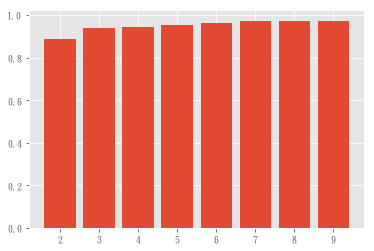

[0.8891151976846485, 0.9372156355908499, 0.9416934844991879, 0.9521856508402198, 0.9634435778090273, 0.9700198987562716, 0.9727865268424818, 0.9712132721718819]


In [33]:
#------------title 
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 迴圈
silhouette_avgs_t = []
ks = range(2,10)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(count_list_t)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg_t = metrics.silhouette_score(count_list_t, cluster_labels)
    silhouette_avgs_t.append(silhouette_avg_t)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs_t)
plt.show()
print(silhouette_avgs_t)

8.用k means分出群

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


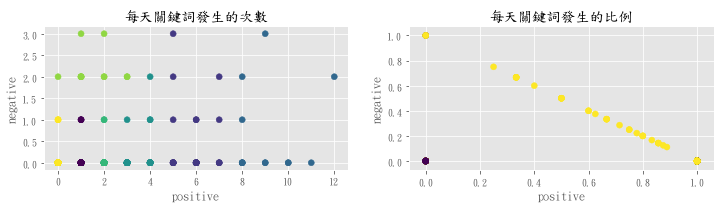

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0]


In [34]:
#---------------title
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(12, 9))
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
ax1 = plt.subplot(3,2,1)  #子圖們
#第一行第二列图形
ax2 = plt.subplot(3,2,2)
plt.sca(ax1)
y_pred_num = cluster.KMeans(n_clusters=7).fit_predict(count_list_num_t)
plt.title('每天關鍵詞發生的次數')
plt.xlabel('positive')
plt.ylabel('negative')
plt.scatter(count_list_num_p_t, count_list_num_n_t,c=y_pred_num)
plt.sca(ax2)
y_pred_per = cluster.KMeans(n_clusters=7).fit_predict(count_list)
plt.title('每天關鍵詞發生的比例')
plt.xlabel('positive')
plt.ylabel('negative')
plt.scatter(count_list_per_p_t, count_list_per_n_t,c=y_pred_per)
plt.show()
print(y_pred_per)

以下用description再做一次結疤整理、情緒分析及kmeans

In [28]:
from jieba.analyse import extract_tags as et
key_word_description_list = []
#for i in tnrange(100, desc='3st loop'):
tag_description=list(et(total_description_str,topK=50, allowPOS=['n','ns','nr','na'],withWeight=True))
#tag_description_2=jieba.analyse.textrank(total_description_str, withWeight=True)
print("check p 3")
#TD-IDF
# for t in tag_title:
#     print(u'方法1'": %s\t\t weight: %f" % (t[0],t[1]))
# #Textrank
# for x, w in tag_title_2:
#     print(u'方法2'": %s\t\t weight: %f" % (x, w))
for t in tag_description:
    key_word_description_list.append(t[0])
print(key_word_description_list)

check p 3
['中國', '美國', '市場', '經濟', '指數', '美中', '台灣', '關稅', '台股', '大陸', '國家', '企業', '雙方', '因應', '資金', '銀行', '中美', '電子', '產品', '財經', '台商', '產業', '亞洲', '代工', '客戶', '董事', '台幣', '總裁', '全球', '東南亞', '訂單', '台達', '法人', '加徵', '川普', '總統', '產線', '終場', '股價', '瑞軒', '軍隊', '匯率', '風險', '半導體', '機會', '權值', '國際', '財報', '股市', '蘋果']


In [35]:
#------------description 翻譯
import jieba.analyse
from nltk.corpus import sinica_treebank
import nltk
# import codecs
# sia = SIA()
from googletrans import Translator
translator = Translator()
trans_to_en_list = []
trans_to_en_dict = {}
for des in key_word_description_list:
    trans_to_en = translator.translate(str(des)).text
    trans_to_en_list.append(trans_to_en)
    trans_to_en_dict[str(trans_to_en)] = des
print(trans_to_en_list,trans_to_en_dict)

['China', 'United States', 'market', 'economic', 'index', 'US and China', 'Taiwan', 'tariff', 'Taiwan stock', 'mainland', 'country', 'enterprise', 'both sides', 'In response', 'funds', 'bank', 'Central America', 'electronic', 'product', 'Finance', 'Taiwanese business', 'industry', 'Asia', 'Foundry', 'client', 'director', 'Taiwan dollar', 'President', 'global', 'Southeast Asia', 'Order', 'Delta', 'Corporation', 'Add', 'Trump', 'president', 'Production line', 'Final', 'share price', 'Ruixuan', 'army', 'exchange rate', 'risk', 'semiconductor', 'opportunity', 'Weight', 'International', 'Financial report', 'stock market', 'apple'] {'China': '中國', 'United States': '美國', 'market': '市場', 'economic': '經濟', 'index': '指數', 'US and China': '美中', 'Taiwan': '台灣', 'tariff': '關稅', 'Taiwan stock': '台股', 'mainland': '大陸', 'country': '國家', 'enterprise': '企業', 'both sides': '雙方', 'In response': '因應', 'funds': '資金', 'bank': '銀行', 'Central America': '中美', 'electronic': '電子', 'product': '產品', 'Finance': '財經'

In [36]:
#------------------description 評分
key_word_description_score_dict_en ={}
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sys
sia = SentimentIntensityAnalyzer()
for key_word_en in trans_to_en_list:
    key_word_description_score = sia.polarity_scores(key_word_en)
    key_word_description_score_dict_en[str(key_word_en)] = key_word_description_score
print(key_word_description_score_dict_en)
influential_key_word_neg_list_en = []
influential_key_word_neu_list_en = []
influential_key_word_pos_list_en = []
influential_key_word_neg_list_tw = []
influential_key_word_neu_list_tw = []
influential_key_word_pos_list_tw = []
# print(key_word_description_score_dict_en[str(Taiwan)]['compound'])
for word in trans_to_en_list:
    if key_word_description_score_dict_en[word]['compound'] < 0:
        influential_key_word_neg_list_en.append(word)
        influential_key_word_neg_list_tw.append(trans_to_en_dict[word])
    if key_word_description_score_dict_en[word]['compound'] == 0:
        influential_key_word_neu_list_en.append(word)
        influential_key_word_neu_list_tw.append(trans_to_en_dict[word])
    if key_word_description_score_dict_en[word]['compound'] > 0:
        influential_key_word_pos_list_en.append(word)
        influential_key_word_pos_list_tw.append(trans_to_en_dict[word])
print(influential_key_word_neg_list_tw)
print(influential_key_word_neu_list_tw)
print(influential_key_word_pos_list_tw)

{'China': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'United States': {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}, 'market': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'economic': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'index': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'US and China': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'Taiwan': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'tariff': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'Taiwan stock': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'mainland': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'country': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'enterprise': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'both sides': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'In response': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'funds': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

In [7]:
#------------------description 每天關鍵詞自述 比例分類
count_list = []
count_list_num = []
count_list_num_p = []
count_list_num_n = []
count_list_per_p = []
count_list_per_n = []
date_percentage_dict_p = {}
date_percentage_dict_n = {}
date_percentage_dict = {}
for d in date_list:
    voc_list_title = udn_title_date_dict[str(d)]
    voc_list_description = udn_description_date_dict[str(d)]
    pos_num = 0
    neg_num = 0
    percentage_of_d_p = 0
    percentage_of_d_n = 0
    for pos_wo in influential_key_word_pos_list_tw:
        for r in range(len(voc_list_description)):
            if pos_wo in voc_list_description[r]:
                pos_num+=1
    for neg_wo in influential_key_word_neg_list_tw:
        for r in range(len(voc_list_description)):
            if neg_wo in voc_list_description[r]:
                neg_num +=1
    if pos_num+neg_num != 0:
        percentage_of_d_p = pos_num/(pos_num+neg_num)
        percentage_of_d_n = neg_num/(pos_num+neg_num)
        count_list.append([percentage_of_d_p,percentage_of_d_n])
        count_list_num.append([pos_num,neg_num])
        count_list_num_p.append(pos_num)
        count_list_num_n.append(neg_num)
        count_list_per_p.append(percentage_of_d_p)
        count_list_per_n.append(percentage_of_d_n)
    else:
        count_list.append([0,0])
        count_list_num.append([0,0])
        count_list_num_p.append(0)
        count_list_num_n.append(0)
        count_list_per_p.append(0)
        count_list_per_n.append(0)
    date_percentage_dict_p[str(d)] = percentage_of_d_p
    date_percentage_dict_n[str(d)] = percentage_of_d_n
    date_percentage_dict[str(d)] = ([percentage_of_d_p,percentage_of_d_n])
#print(date_percentage_dict)    
#print(count_list)

決定分群數量 使用metrics.silhouette_score決定分群數量，可知差異有限但分成十群效果可能最好。然而此處為了方便操作先以三群為試驗。

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  

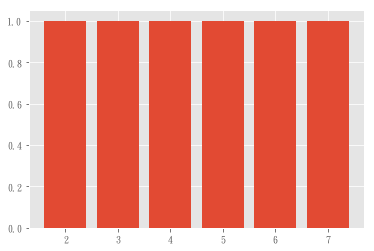

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [37]:
#------------des 
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 迴圈
silhouette_avgs = []
ks = range(2,8)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(count_list)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(count_list, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

用k means分出群 用sklearn.cluster.KMeans，以各天正負關鍵詞比例及數量XY軸，將日期分成三群，並視覺化分群

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


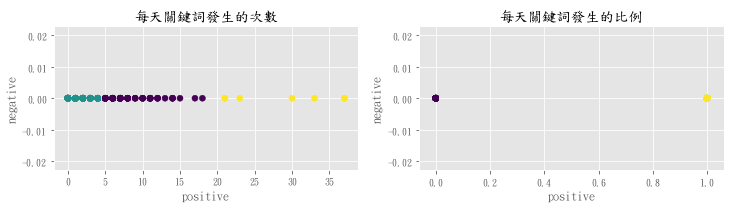

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0]


In [21]:
#---------------des
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(12, 9))
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
ax1 = plt.subplot(3,2,1)  #子圖們
#第一行第二列图形
ax2 = plt.subplot(3,2,2)
plt.sca(ax1)
y_pred_num = cluster.KMeans(n_clusters=3).fit_predict(count_list_num)
plt.title('每天關鍵詞發生的次數')
plt.xlabel('positive')
plt.ylabel('negative')
plt.scatter(count_list_num_p, count_list_num_n,c=y_pred_num)
plt.sca(ax2)
y_pred_per = cluster.KMeans(n_clusters=3).fit_predict(count_list)
plt.title('每天關鍵詞發生的比例')
plt.xlabel('positive')
plt.ylabel('negative')
plt.scatter(count_list_per_p, count_list_per_n,c=y_pred_per)
plt.show()
print(y_pred_per)

In [117]:
import xlrd 
# # 以xlrd打開表格給book
# book = xlrd.open_workbook("C:\\Users\\Will\\Desktop\\經濟日報文字內容1.csv")
# # 獲取工作表的方法之一，用下標。
# sheel_1 = book.sheet_by_index(0)
# # 打印第一個工作表中行0列1的值，用下標。
# print(sheel_1.cell_value(rowx=0,colx=0))
file_r = "C:\\Users\\Will\\Desktop\\經濟日報文字內容1.csv"
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(0)
print(sheet_1.cell_value(rowx=0,colx=0))
print(sheet_1.cell_value(rowx=0,colx=1))
print(sheet_1.cell_value(rowx=0,colx=2))

2019/05/27 20:51:34
諾貝爾經濟學獎得主羅默：貿易戰將持續 各國宜應變 | 美中貿易戰 | 國際 | 經濟日報
2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）27日抵台指出，美國這波景氣循環仍將持續。美中貿易戰也將...


9.k means及nltk分類法的小結論
這次使用nltk情緒分析，從經濟日報的標題、簡介找出適當的正負面關鍵詞清單，再用kmeans分群分析找出類別，歲未進行t檢定測試，但可以看出成效不彰，因為正負面關鍵詞清單內容過少，可能有三項原因:
1.經濟日報內容或用字習慣相當中性，以陳述事實為主，很少評論
2.nltk情緒分析過於嚴苛，難以分出足夠數量的正負面情緒
3.大多會經常出現的詞都為中性，應該用整句的方式判斷情緒更佳
考量到這三點論，我們彙集英國路透社和bbc的資料，並使用完整句子來判斷情緒，降低媒體自身用詞習慣的影響。